<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [57]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [58]:
# IMPORT LIBRARIES
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [59]:
csv_file = 'ais.csv'

### 2. Do some EDA of relationships between features.

In [60]:
df = pd.read_csv(csv_file)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [62]:
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [63]:
df.describe()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,101.500000,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,58.456537,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,1.000000,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,51.250000,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,101.500000,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,151.750000,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,202.000000,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


In [64]:
df['sex'].unique()
df['sport'].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [65]:
new_df = df.drop(columns=['Unnamed: 0', 'sex', 'sport'])

In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 17.5 KB


In [67]:
new_df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [68]:
from sklearn.preprocessing import MinMaxScaler
#  Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the new DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

scaled_df.head()  # Display the first few rows of the scaled DataFrame

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,0.054795,0.381818,0.067227,0.092105,0.230088,0.215620,0.469329,0.472399,0.404243,0.776860,0.481265
1,0.208904,0.454545,0.096639,0.144737,0.265487,0.221845,0.432870,0.524256,0.337661,0.674380,0.428571
2,0.116438,0.154545,0.021008,0.000000,0.057522,0.289191,0.443287,0.476748,0.293132,0.477686,0.366511
3,0.106164,0.181818,0.058824,0.131579,0.269912,0.290323,0.569444,0.603212,0.318537,0.596694,0.434426
4,0.222603,0.318182,0.235294,0.315789,0.092920,0.125071,0.302662,0.401807,0.262982,0.590083,0.313817


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

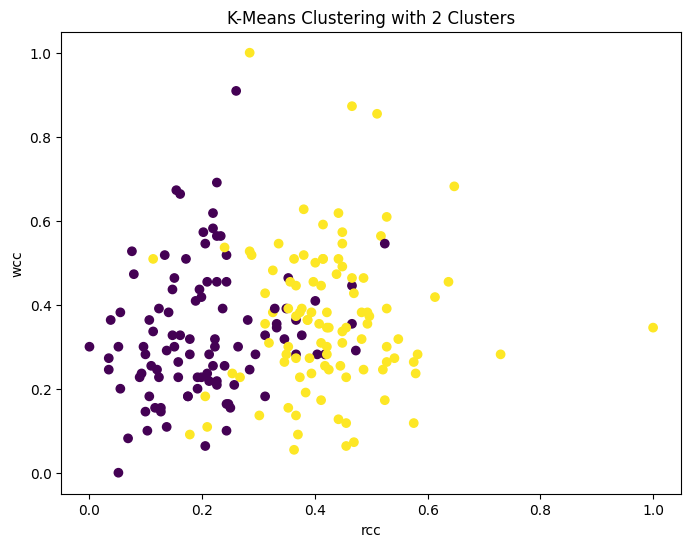

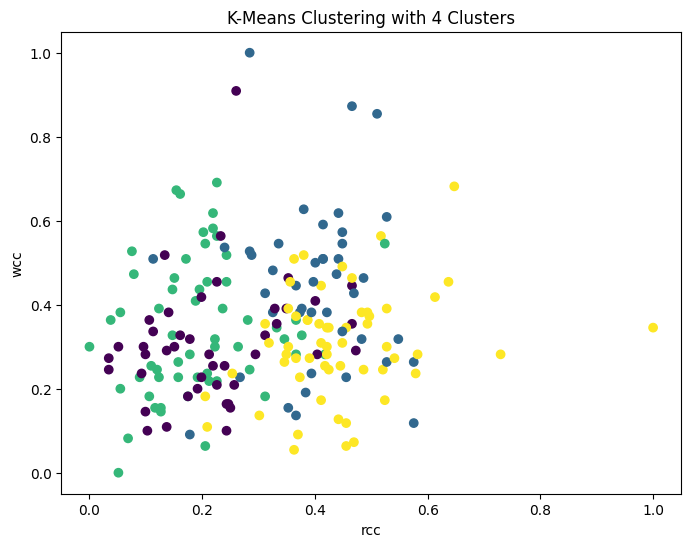

In [69]:
# ANSWER
# Function to run KMeans and display results

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def run_kmeans_and_plot(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    
    # Add cluster results to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = clusters
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(data_with_clusters.iloc[:, 0], data_with_clusters.iloc[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

# Run KMeans with k=2
run_kmeans_and_plot(scaled_df, 2)

# Run KMeans with k=4
run_kmeans_and_plot(scaled_df, 4)

### 5. Get the labels for the models using the labels_ attribute.



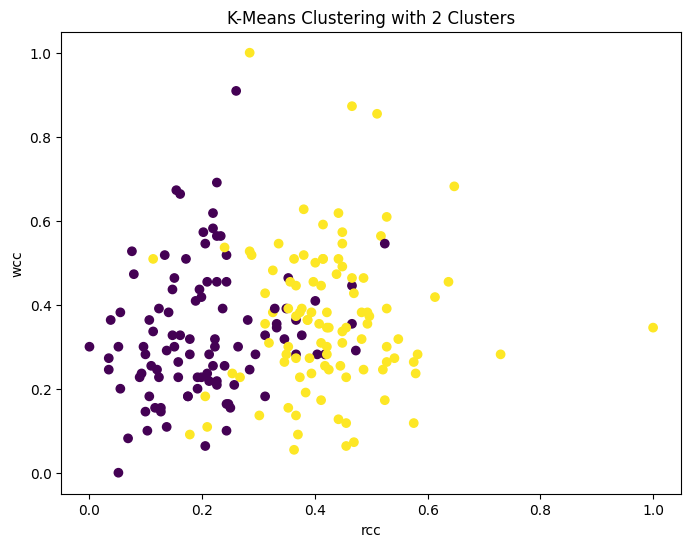

Labels for k=2:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


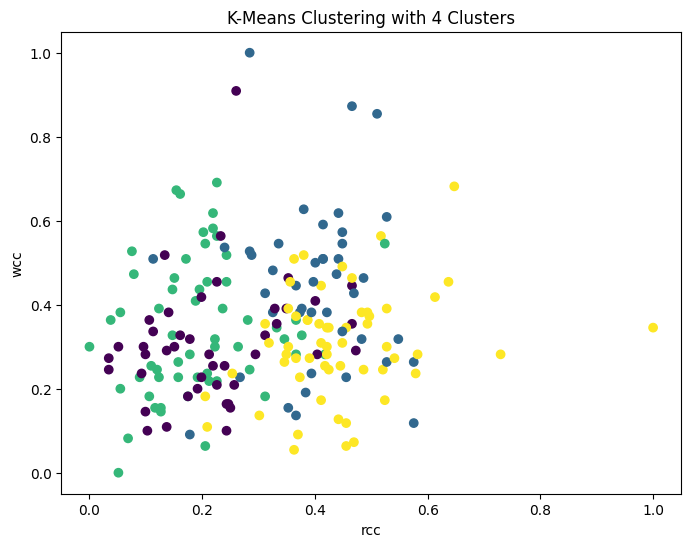

Labels for k=4:
[2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0 0 0 3 1 2 2 2 2
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 1 3 1 3
 3 1 1 3 3 1 1 1 1 0 1 1 3 1 1 3 1 3 3 1 3 1 1 1 3 1 3 3 3 0 3 3 3 1 1 3 3
 3 3 3 3 0 3 0 3 3 3 3 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 1 1 1 1
 1 1 3 1 1 3 1 3 1 1 1 3 1 3 3 1 3]


In [70]:
# ANSWER
# Function to run KMeans and get labels
def run_kmeans_and_get_labels(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Add cluster results to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = labels
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(data_with_clusters.iloc[:, 0], data_with_clusters.iloc[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()
    
    return labels

# Run KMeans with k=2 and get labels
labels_k2 = run_kmeans_and_get_labels(scaled_df, 2)
print("Labels for k=2:")
print(labels_k2)

# Run KMeans with k=4 and get labels
labels_k4 = run_kmeans_and_get_labels(scaled_df, 4)
print("Labels for k=4:")
print(labels_k4)

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

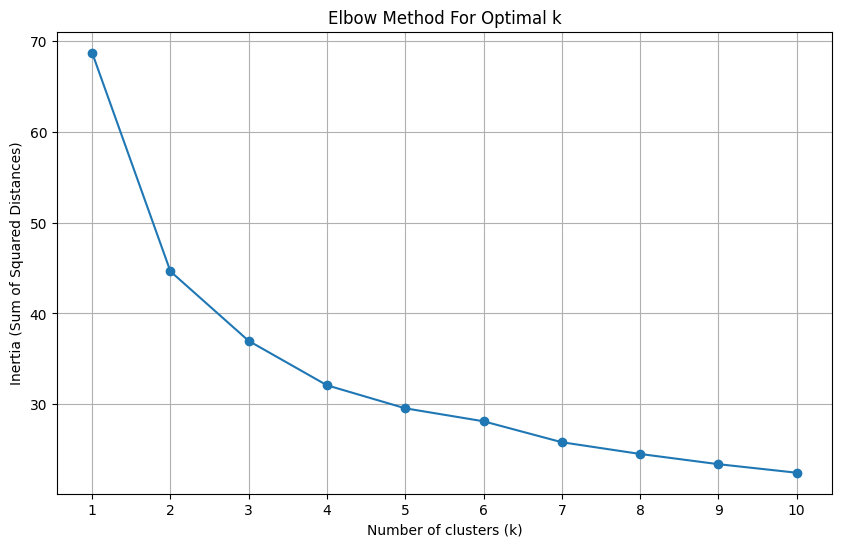

In [71]:
# ANSWER
# Define the range of k values to test
k_values = range(1, 11)

# List to store the inertia values for each k
inertia_values = []

# Run KMeans for each k value and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

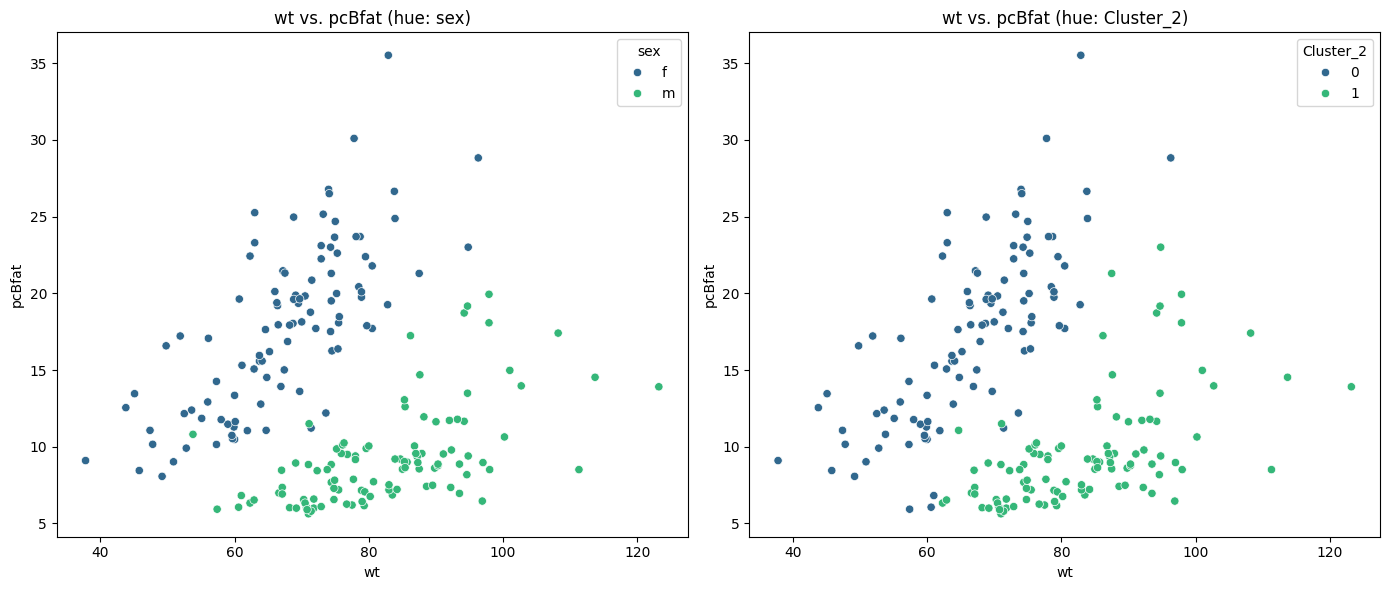

In [72]:
# ANSWER


# Run KMeans with k=2 and k=4 and get labels
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df['Cluster_2'] = kmeans_2.fit_predict(scaled_df)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(scaled_df)

# Plotting wt vs. pcBfat using hue sex
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='wt', y='pcBfat', hue='sex', palette='viridis')
plt.title('wt vs. pcBfat (hue: sex)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='wt', y='pcBfat', hue='Cluster_2', palette='viridis')
plt.title('wt vs. pcBfat (hue: Cluster_2)')

plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



